In [1]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
from visualize import visualize
from utils import *

%matplotlib inline

In [2]:
df = pd.read_csv('../saved/df.csv')
df.shape

(24782, 14)

In [3]:
# df['ratio'] = df.apply(lambda x : float(x['w'] / x['h']), axis=1)

In [4]:
df.head()

file_name          task label  \
0  patch_images/2021.01.14/LBC424-20210111(1)/LBC...  [AS6] LBC424     C   
1  patch_images/2021.01.14/LBC424-20210111(1)/LBC...  [AS6] LBC424    AS   
2  patch_images/2021.01.14/LBC424-20210111(1)/LBC...  [AS6] LBC424    AS   
3  patch_images/2021.01.14/LBC424-20210111(1)/LBC...  [AS6] LBC424    AS   
4  patch_images/2021.01.14/LBC424-20210111(1)/LBC...  [AS6] LBC424    AS   

   xmin  ymin    w    h  occluded  des cell_type                   bbox  area  \
0  1539   199  139  211         0  NaN    ASC-US  [1539, 199, 139, 211]   171   
1  1337   102  256  136         0  NaN    ASC-US  [1337, 102, 256, 136]   186   
2   220   619  166  169         0  NaN    ASC-US   [220, 619, 166, 169]   167   
3   658  1747  191  166         0  NaN    ASC-US  [658, 1747, 191, 166]   178   
4  1571   365  136  146         0  NaN    ASC-US  [1571, 365, 136, 146]   140   

      ratio  ID  
0  0.811645   0  
1  1.371989   1  
2  0.991085   2  
3  1.072661   3  
4  0.965146   4

In [5]:
df.label.unique()

array(['C', 'AS', 'ASC-US', 'LSIL', 'LS', 'HS', 'Negative',
       'N - Endocervical Cell', 'ASC-H', 'AH', 'Carcinoma',
       'ASC-US with HPV infection', 'HSIL', 'HSIL with HPV infection',
       'Candida', 'LSIL with HPV infection', 'ASCUS-SIL', '판독불가', 'HN',
       'SC', 'H', 'N - Endometrial cell', 'Benign atypia',
       'ASC-H with HPV infection'], dtype=object)

In [6]:
df[df['label']=='Negative'].describe()

xmin         ymin            w            h  occluded  des  \
count  4468.000000  4468.000000  4468.000000  4468.000000    4468.0  0.0   
mean    931.792525   840.911817   193.343107   195.574978       0.0  NaN   
std     513.100683   487.775072   122.020960   114.499665       0.0  NaN   
min       0.000000     0.000000     5.000000     2.000000       0.0  NaN   
25%     521.750000   441.750000   114.000000   119.000000       0.0  NaN   
50%     946.000000   826.000000   164.000000   169.000000       0.0  NaN   
75%    1347.250000  1211.000000   223.250000   231.000000       0.0  NaN   
max    1964.000000  1965.000000  1099.000000  1007.000000       0.0  NaN   

              area        ratio            ID  
count  4468.000000  4468.000000   4468.000000  
mean    191.579902     0.998665   7832.624888  
std     109.680731     0.147627   5504.490027  
min       3.000000     0.543115    408.000000  
25%     118.000000     0.902162   2987.000000  
50%     166.000000     0.988851   6936.500000  
75%     223.000000     1.076762   9086.250000  
max     923.000000     1.867468  17699.000000

In [7]:
df[df['label']=='ASC-US'].describe()

xmin         ymin            w            h  occluded  des  \
count  2897.000000  2897.000000  2897.000000  2897.000000    2897.0  0.0   
mean    974.888851   734.215050   157.486020   160.183293       0.0  NaN   
std     501.783082   465.073455    61.417559    62.377144       0.0  NaN   
min       0.000000     0.000000     5.000000     2.000000       0.0  NaN   
25%     565.000000   358.000000   116.000000   116.000000       0.0  NaN   
50%     984.000000   674.000000   146.000000   149.000000       0.0  NaN   
75%    1377.000000  1058.000000   184.000000   190.000000       0.0  NaN   
max    1957.000000  1942.000000   646.000000   632.000000       0.0  NaN   

              area        ratio            ID  
count  2897.000000  2897.000000   2897.000000  
mean    156.224370     1.006251   9032.051778  
std      54.581305     0.179554   5384.492425  
min      10.000000     0.097129      8.000000  
25%     119.000000     0.898459   4530.000000  
50%     148.000000     0.989380   7971.000000  
75%     181.000000     1.100763  13439.000000  
max     523.000000     5.385165  17808.000000

In [8]:
df[df['label']=='AS'].describe()

xmin         ymin            w            h     occluded  des  \
count  6562.000000  6562.000000  6562.000000  6562.000000  6562.000000  0.0   
mean    954.876714   838.832063   181.300975   183.667937     0.001829  NaN   
std     530.414667   516.962628    78.194407    79.314324     0.042728  NaN   
min       0.000000     0.000000     4.000000     4.000000     0.000000  NaN   
25%     525.000000   405.000000   126.000000   128.250000     0.000000  NaN   
50%     963.500000   796.000000   166.000000   169.000000     0.000000  NaN   
75%    1390.000000  1259.000000   218.000000   221.000000     0.000000  NaN   
max    1989.000000  1977.000000   726.000000   769.000000     1.000000  NaN   

              area        ratio            ID  
count  6562.000000  6562.000000   6562.000000  
mean    179.576349     1.006132   9445.765163  
std      70.966434     0.163862   5016.955622  
min       5.000000     0.502062      1.000000  
25%     130.000000     0.898893   5480.250000  
50%     167.000000     0.991923  10149.000000  
75%     213.000000     1.101725  13938.750000  
max     619.000000     2.179449  17736.000000

In [9]:
df[df['label']=='AS'][df['w']==4.]

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


file_name          task label  \
24670  patch_images/2021.01.14/LBC412-20210111(1)/LBC...  [AS6] LBC412    AS   

       xmin  ymin  w  h  occluded  des cell_type              bbox  area  \
24670   452   602  4  7         0  NaN    ASC-US  [452, 602, 4, 7]     5   

          ratio     ID  
24670  0.755929  17723

In [10]:
df.describe()

xmin          ymin             w             h     occluded  \
count  24782.000000  24782.000000  24782.000000  24782.000000  24782.00000   
mean     947.351465    812.966508    187.190622    189.981842      0.00109   
std      524.660062    504.670753    110.614362    109.292266      0.03299   
min        0.000000      0.000000      2.000000      2.000000      0.00000   
25%      515.000000    390.000000    121.000000    124.000000      0.00000   
50%      956.000000    772.000000    162.000000    166.000000      0.00000   
75%     1380.000000   1207.000000    220.000000    224.000000      0.00000   
max     1998.000000   1987.000000   2010.000000   2027.000000      1.00000   

       des          area         ratio            ID  
count  0.0  24782.000000  24782.000000  24782.000000  
mean   NaN    185.233032      1.004148   8900.100920  
std    NaN     99.944253      0.171389   5204.269394  
min    NaN      3.000000      0.097129      0.000000  
25%    NaN    125.000000      0.898342   4225.250000  
50%    NaN    164.000000      0.990783   8657.000000  
75%    NaN    216.000000      1.092815  13483.750000  
max    NaN   2018.000000      5.385165  17808.000000

In [11]:
test_df = df[(df['area'] < 100) | (df['w'] < 10) | (df['h'] < 10)]
test_df.shape

(2892, 14)

In [12]:
# diag = 70
# test_df = df[(df['diag'] > diag) & (df['diag'] < diag+10)]
# test_df

In [13]:
path = test_df[['file_name']].values
path[0][0]

'patch_images/2021.01.14/LBC427-20210111(1)/LBC427-20210111(1)_740.png'

In [14]:
boxes = test_df[['xmin', 'ymin', 'w', 'h']].values
boxes[0]

array([1021,  633,   96,   91])

In [15]:
labels = test_df[['label']].values

['AS']


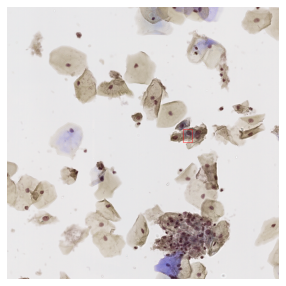

In [16]:
NUM = 11
rel_path = '../../lbp_data/'
img = cv2.imread(rel_path + path[NUM][0])
img.shape

print(labels[NUM])
visualize(img, [boxes[NUM]])

In [17]:
# test_df = df[(df['diag'] < 70) | (df['w'] < 30) | (df['h'] < 30)]
# test_df.head()

In [18]:
test_df = df[(df['area'] < 70) | (df['w'] < 10) | (df['h'] < 10)]
test_df.sort_values(by = 'area', inplace=True)
test_df.head()

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


file_name           task  \
3948   patch_images/2021.01.08/LBC108-20210105(1)/LBC...         LBC108   
63     patch_images/2021.01.14/LBC427-20210111(1)/LBC...  [LSIL] LBC427   
21290  patch_images/2021.05.17/LBC747-20210115(1)/LBC...         LBC747   
21125  patch_images/2021.05.20/LBC890-20210118(1)/LBC...         LBC890   
24670  patch_images/2021.01.14/LBC412-20210111(1)/LBC...   [AS6] LBC412   

          label  xmin  ymin   w   h  occluded  des cell_type  \
3948   Negative  1810  1478   5   2         0  NaN       NaN   
63           LS   835  1586   2   8         0  NaN      LSIL   
21290        AH  1052  1334   2  12         0  NaN     ASC-H   
21125        LS  1117  1380  12   2         0  NaN      LSIL   
24670        AS   452   602   4   7         0  NaN    ASC-US   

                      bbox  area     ratio     ID  
3948    [1810, 1478, 5, 2]     3  1.581139   2961  
63       [835, 1586, 2, 8]     4  0.500000     54  
21290  [1052, 1334, 2, 12]     4  0.408248  15564  
21125  [1117, 1380, 12, 2]     4  2.449490  15436  
24670     [452, 602, 4, 7]     5  0.755929  17723

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(21, 14)
['C']
['ASC-US']
['ASC-H']
['ASC-H']
['Candida']


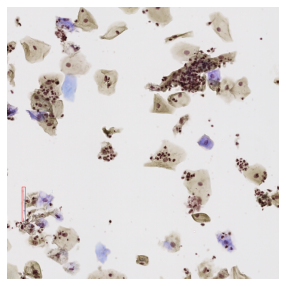

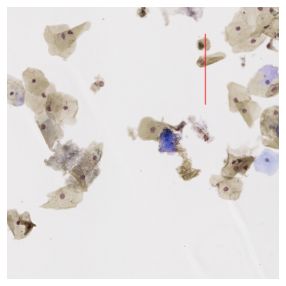

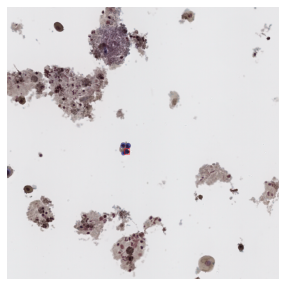

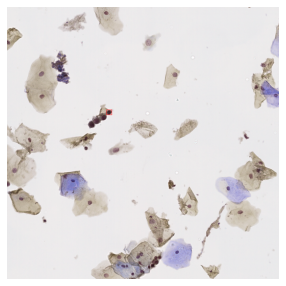

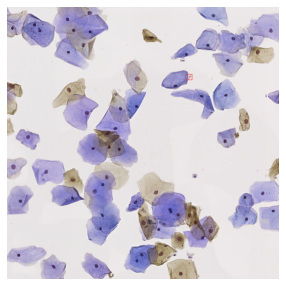

In [19]:
# check abnormally small size sample or long tailed 
test_df = df[(df['area'] < 40) | (df['w'] < 10) | (df['h'] < 10) | (df['ratio'] > 3) | (df['ratio'] < 0.33) ]
test_df.sort_values(by = 'area', inplace=True, ascending=False)
print(test_df.shape)
path = test_df[['file_name']].values
boxes = test_df[['xmin', 'ymin', 'w', 'h']].values
labels = test_df[['label']].values

rel_path = '../../lbp_data/'
# for NUM in range(len(test_df)) :
for NUM in range(5) :
    img = cv2.imread(rel_path + path[NUM][0])
    print(labels[NUM])
    visualize(img, [boxes[NUM]])    
    

In [20]:
df.label.value_counts()

AS                           6562
Negative                     4468
LS                           3083
ASC-US                       2897
LSIL                         1689
ASC-US with HPV infection    1603
AH                            962
HS                            667
HSIL                          548
C                             527
LSIL with HPV infection       479
Candida                       402
N - Endocervical Cell         306
ASC-H                         263
HSIL with HPV infection       142
HN                            102
Benign atypia                  46
Carcinoma                      18
H                               9
판독불가                            4
ASCUS-SIL                       2
SC                              1
N - Endometrial cell            1
ASC-H with HPV infection        1
Name: label, dtype: int64

In [21]:
df[(df['label'] == 'AS') | (df['label'] == 'ASC-US') | (df['label'] == 'ASC-US with HPV infection')].describe()

xmin          ymin             w             h      occluded  \
count  11062.000000  11062.000000  11062.000000  11062.000000  11062.000000   
mean     958.920900    811.955343    171.950461    174.389893      0.001085   
std      520.620453    502.393491     71.155632     72.018521      0.032920   
min        0.000000      0.000000      4.000000      2.000000      0.000000   
25%      537.000000    392.000000    124.000000    126.000000      0.000000   
50%      966.000000    764.000000    158.000000    161.000000      0.000000   
75%     1385.000000   1202.000000    205.000000    206.000000      0.000000   
max     1989.000000   1977.000000    726.000000    769.000000      1.000000   

       des          area         ratio            ID  
count  0.0  11062.000000  11062.000000  11062.000000  
mean   NaN    170.504520      1.005214   9392.126559  
std    NaN     64.300331      0.163271   5183.744804  
min    NaN      5.000000      0.097129      1.000000  
25%    NaN    127.000000      0.902112   5122.000000  
50%    NaN    159.000000      0.991304  10167.500000  
75%    NaN    200.000000      1.095445  14014.750000  
max    NaN    619.000000      5.385165  17808.000000

In [22]:
df[(df['label'] == 'LS') | (df['label'] == 'LSIL') | (df['label'] == 'LSIL with HPV infection')].describe()

xmin         ymin            w            h     occluded  des  \
count  5251.000000  5251.000000  5251.000000  5251.000000  5251.000000  0.0   
mean    934.731480   800.077509   207.053894   208.897543     0.001904  NaN   
std     530.175311   514.136653    96.239528    94.783112     0.043602  NaN   
min       0.000000     0.000000     2.000000     2.000000     0.000000  NaN   
25%     489.000000   363.000000   146.000000   149.000000     0.000000  NaN   
50%     937.000000   757.000000   189.000000   192.000000     0.000000  NaN   
75%    1367.000000  1209.500000   241.000000   243.000000     0.000000  NaN   
max    1969.000000  1977.000000  1554.000000  1504.000000     1.000000  NaN   

              area        ratio            ID  
count  5251.000000  5251.000000   5251.000000  
mean    204.875262     1.006342   9035.173491  
std      87.384374     0.164169   5431.955579  
min       4.000000     0.500000     23.000000  
25%     152.000000     0.895124   4605.000000  
50%     188.000000     0.993341   9645.000000  
75%     234.000000     1.098716  14125.500000  
max    1353.000000     2.449490  17801.000000

In [23]:
df[(df['label'] == 'HS') | (df['label'] == 'HSIL') | (df['label'] == 'HSIL with HPV infection')].describe()

xmin         ymin            w            h     occluded  des  \
count  1357.000000  1357.000000  1357.000000  1357.000000  1357.000000  0.0   
mean    975.057480   808.848195   128.154753   129.663965     0.001474  NaN   
std     546.560848   508.590505    75.293837    72.856502     0.038376  NaN   
min       0.000000     0.000000     9.000000     4.000000     0.000000  NaN   
25%     502.000000   369.000000    83.000000    84.000000     0.000000  NaN   
50%     990.000000   769.000000   107.000000   110.000000     0.000000  NaN   
75%    1466.000000  1214.000000   144.000000   150.000000     0.000000  NaN   
max    1966.000000  1987.000000   754.000000   777.000000     1.000000  NaN   

              area        ratio            ID  
count  1357.000000  1357.000000   1357.000000  
mean    127.070007     0.999809   9434.712601  
std      69.755390     0.141363   3933.053393  
min       6.000000     0.600925    112.000000  
25%      85.000000     0.912871   7886.000000  
50%     107.000000     0.988743  10084.000000  
75%     144.000000     1.072113  11841.000000  
max     657.000000     2.179449  17194.000000

In [24]:
df[(df['label'] == 'ASC-H') | (df['label'] == 'AH')].describe()

xmin         ymin            w            h     occluded  des  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000  0.0   
mean   1003.368980   791.961633   138.901224   140.569796     0.001633  NaN   
std     538.796407   517.535670   101.487881    95.379224     0.040390  NaN   
min       0.000000     0.000000     2.000000    12.000000     0.000000  NaN   
25%     541.000000   353.000000    81.000000    83.000000     0.000000  NaN   
50%    1021.000000   716.000000   104.000000   107.000000     0.000000  NaN   
75%    1463.000000  1195.000000   152.000000   157.000000     0.000000  NaN   
max    1998.000000  1936.000000   842.000000   689.000000     1.000000  NaN   

              area        ratio            ID  
count  1225.000000  1225.000000   1225.000000  
mean    137.699592     0.997517   9367.984490  
std      93.724606     0.142207   4093.479895  
min       4.000000     0.408248    641.000000  
25%      82.000000     0.905822   7991.000000  
50%     105.000000     0.991521   8780.000000  
75%     152.000000     1.080123  11964.000000  
max     705.000000     1.521616  17487.000000

In [25]:
df[(df['label'] == 'Candida') | (df['label'] == 'C')].describe()

xmin         ymin            w            h  occluded  des  \
count   929.000000   929.000000   929.000000   929.000000     929.0  0.0   
mean    915.767492   787.223897   267.860065   287.256189       0.0  NaN   
std     512.768065   508.568520   208.978086   206.787760       0.0  NaN   
min       0.000000     0.000000    20.000000    26.000000       0.0  NaN   
25%     509.000000   364.000000   129.000000   144.000000       0.0  NaN   
50%     923.000000   744.000000   209.000000   240.000000       0.0  NaN   
75%    1312.000000  1177.000000   347.000000   371.000000       0.0  NaN   
max    1969.000000  1907.000000  1913.000000  1628.000000       0.0  NaN   

              area       ratio            ID  
count   929.000000  929.000000    929.000000  
mean    260.048439    1.015656   6333.820237  
std     162.236852    0.367890   4665.372148  
min      28.000000    0.310685      0.000000  
25%     149.000000    0.749728   2042.000000  
50%     223.000000    0.962392   9333.000000  
75%     328.000000    1.216969   9970.000000  
max    1327.000000    2.850439  15011.000000

In [26]:
df[(df['label'] == 'Negative')].describe()

xmin         ymin            w            h  occluded  des  \
count  4468.000000  4468.000000  4468.000000  4468.000000    4468.0  0.0   
mean    931.792525   840.911817   193.343107   195.574978       0.0  NaN   
std     513.100683   487.775072   122.020960   114.499665       0.0  NaN   
min       0.000000     0.000000     5.000000     2.000000       0.0  NaN   
25%     521.750000   441.750000   114.000000   119.000000       0.0  NaN   
50%     946.000000   826.000000   164.000000   169.000000       0.0  NaN   
75%    1347.250000  1211.000000   223.250000   231.000000       0.0  NaN   
max    1964.000000  1965.000000  1099.000000  1007.000000       0.0  NaN   

              area        ratio            ID  
count  4468.000000  4468.000000   4468.000000  
mean    191.579902     0.998665   7832.624888  
std     109.680731     0.147627   5504.490027  
min       3.000000     0.543115    408.000000  
25%     118.000000     0.902162   2987.000000  
50%     166.000000     0.988851   6936.500000  
75%     223.000000     1.076762   9086.250000  
max     923.000000     1.867468  17699.000000

In [27]:
df[(df['label'] == 'Negative') & (df['area'] < 200)].describe()

xmin         ymin            w            h  occluded  des  \
count  2960.000000  2960.000000  2960.000000  2960.000000    2960.0  0.0   
mean    966.430405   852.539865   133.291216   138.046622       0.0  NaN   
std     499.493689   470.508162    41.791299    43.062556       0.0  NaN   
min       0.000000     0.000000     5.000000     2.000000       0.0  NaN   
25%     572.750000   472.000000    99.000000   104.000000       0.0  NaN   
50%     979.000000   832.000000   129.000000   135.000000       0.0  NaN   
75%    1365.500000  1197.500000   164.000000   169.000000       0.0  NaN   
max    1964.000000  1965.000000   283.000000   318.000000       0.0  NaN   

              area        ratio            ID  
count  2960.000000  2960.000000   2960.000000  
mean    133.848311     0.992042   8763.012838  
std      37.124576     0.136768   5893.556974  
min       3.000000     0.564745    408.000000  
25%     103.000000     0.903245   3533.750000  
50%     133.000000     0.985184   6968.000000  
75%     166.000000     1.069045  17228.000000  
max     199.000000     1.727862  17699.000000

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(820, 14)
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']
['Negative']


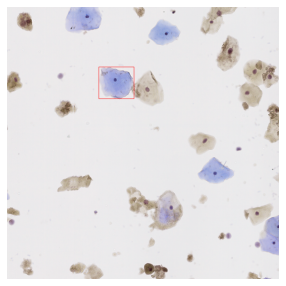

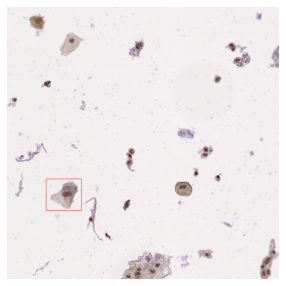

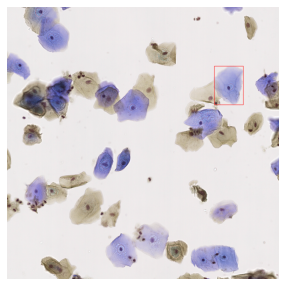

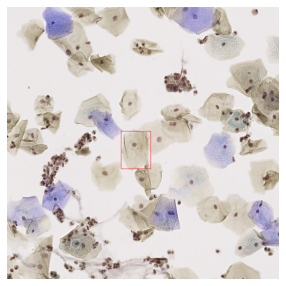

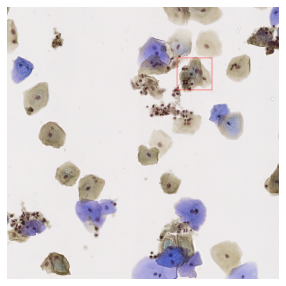

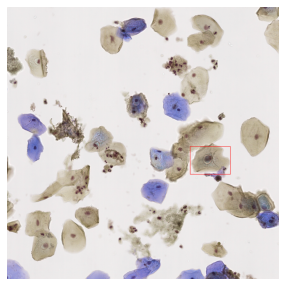

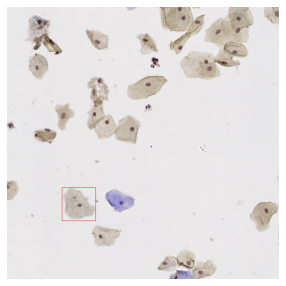

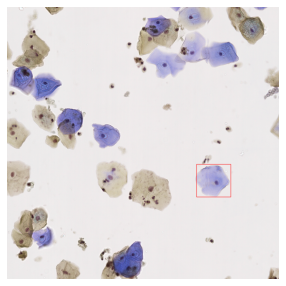

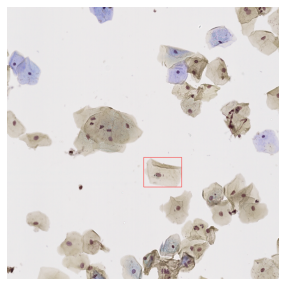

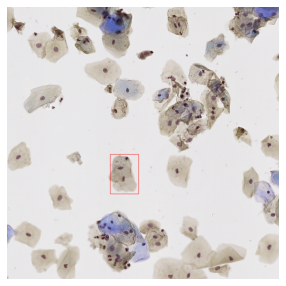

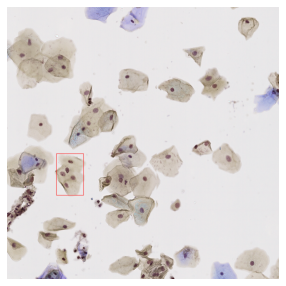

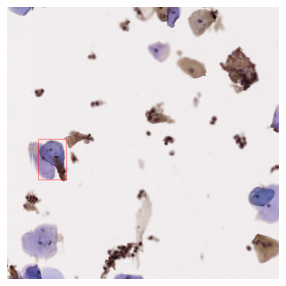

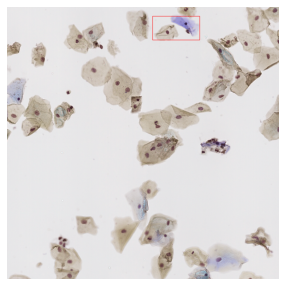

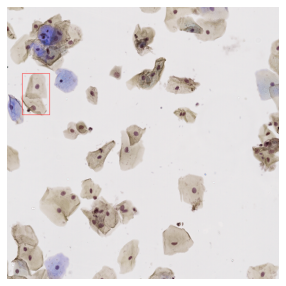

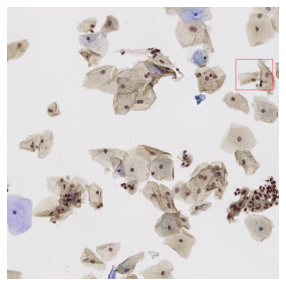

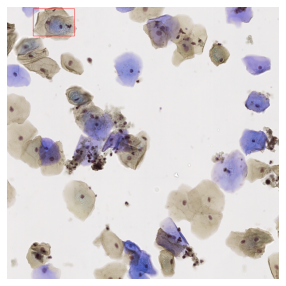

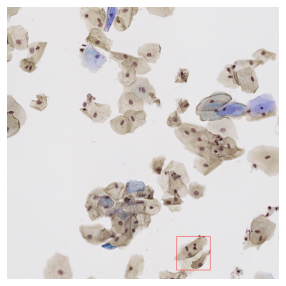

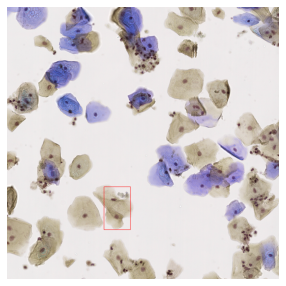

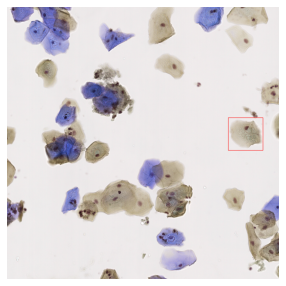

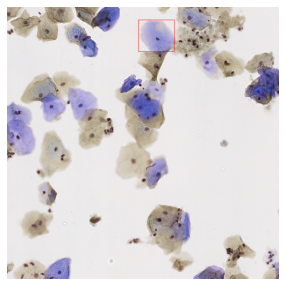

In [28]:
test_df = df[(df['label'] == 'Negative') & (df['area'] > 250)]
test_df.sort_values(by = 'area', inplace=True, ascending=True)
print(test_df.shape)
path = test_df[['file_name']].values
boxes = test_df[['xmin', 'ymin', 'w', 'h']].values
labels = test_df[['label']].values

rel_path = '../../lbp_data/'
# for NUM in range(len(test_df)) :
for NUM in range(20) :
    img = cv2.imread(rel_path + path[NUM][0])
    print(labels[NUM])
    visualize(img, [boxes[NUM]])    

In [29]:
df.label.value_counts()

AS                           6562
Negative                     4468
LS                           3083
ASC-US                       2897
LSIL                         1689
ASC-US with HPV infection    1603
AH                            962
HS                            667
HSIL                          548
C                             527
LSIL with HPV infection       479
Candida                       402
N - Endocervical Cell         306
ASC-H                         263
HSIL with HPV infection       142
HN                            102
Benign atypia                  46
Carcinoma                      18
H                               9
판독불가                            4
ASCUS-SIL                       2
SC                              1
N - Endometrial cell            1
ASC-H with HPV infection        1
Name: label, dtype: int64

In [30]:
df.describe()

xmin          ymin             w             h     occluded  \
count  24782.000000  24782.000000  24782.000000  24782.000000  24782.00000   
mean     947.351465    812.966508    187.190622    189.981842      0.00109   
std      524.660062    504.670753    110.614362    109.292266      0.03299   
min        0.000000      0.000000      2.000000      2.000000      0.00000   
25%      515.000000    390.000000    121.000000    124.000000      0.00000   
50%      956.000000    772.000000    162.000000    166.000000      0.00000   
75%     1380.000000   1207.000000    220.000000    224.000000      0.00000   
max     1998.000000   1987.000000   2010.000000   2027.000000      1.00000   

       des          area         ratio            ID  
count  0.0  24782.000000  24782.000000  24782.000000  
mean   NaN    185.233032      1.004148   8900.100920  
std    NaN     99.944253      0.171389   5204.269394  
min    NaN      3.000000      0.097129      0.000000  
25%    NaN    125.000000      0.898342   4225.250000  
50%    NaN    164.000000      0.990783   8657.000000  
75%    NaN    216.000000      1.092815  13483.750000  
max    NaN   2018.000000      5.385165  17808.000000

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4, 14)
['판독불가']
['판독불가']
['판독불가']
['판독불가']


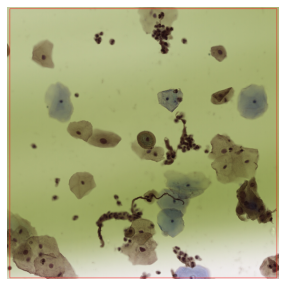

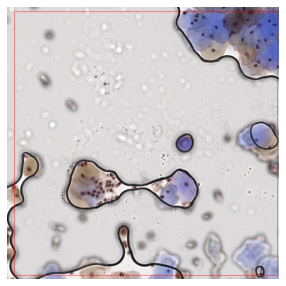

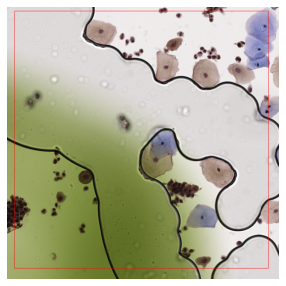

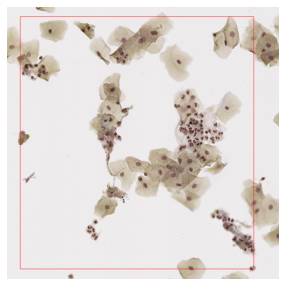

In [31]:
# check abnormally large sample except candida
test_df = df[(df['label'] != 'Candida') & (df['label'] != 'C')& (df['area'] > 1400)]
test_df.sort_values(by = 'area', inplace=True, ascending=False)
print(test_df.shape)
path = test_df[['file_name']].values
boxes = test_df[['xmin', 'ymin', 'w', 'h']].values
labels = test_df[['label']].values

rel_path = '../../lbp_data/'
for NUM in range(len(test_df)) :
# for NUM in range(20) :
    img = cv2.imread(rel_path + path[NUM][0])
    print(labels[NUM])
    visualize(img, [boxes[NUM]])  

In [32]:
df.label.unique()

array(['C', 'AS', 'ASC-US', 'LSIL', 'LS', 'HS', 'Negative',
       'N - Endocervical Cell', 'ASC-H', 'AH', 'Carcinoma',
       'ASC-US with HPV infection', 'HSIL', 'HSIL with HPV infection',
       'Candida', 'LSIL with HPV infection', 'ASCUS-SIL', '판독불가', 'HN',
       'SC', 'H', 'N - Endometrial cell', 'Benign atypia',
       'ASC-H with HPV infection'], dtype=object)

In [33]:
from utils import drop_wrong

In [34]:
df = pd.read_csv('../saved/df.csv')
df.shape

(24782, 14)

In [35]:
df = drop_wrong(df)
df.shape

(22663, 14)

/home/beomgon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(383, 14)
['LSIL']
['HSIL']
['LSIL']
['ASC-US']
['LSIL']
['LSIL']
['ASC-US']
['LSIL']
['LSIL']
['ASC-US']


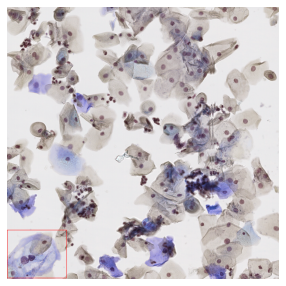

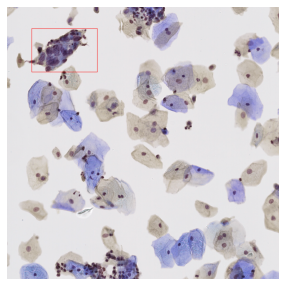

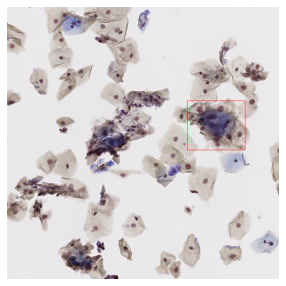

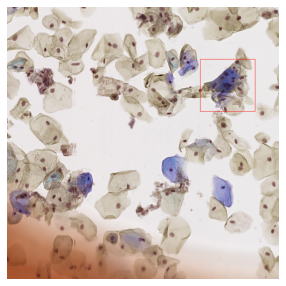

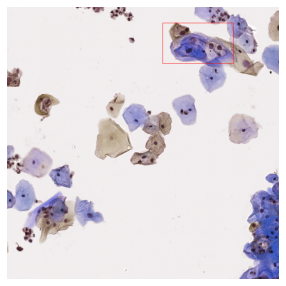

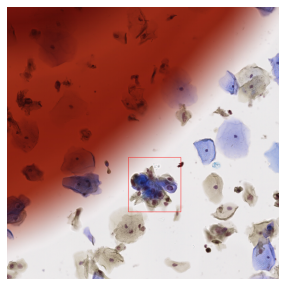

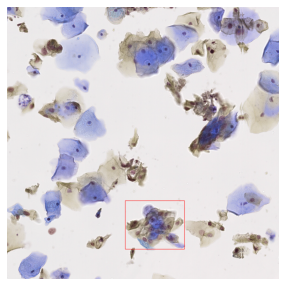

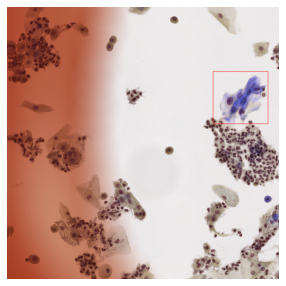

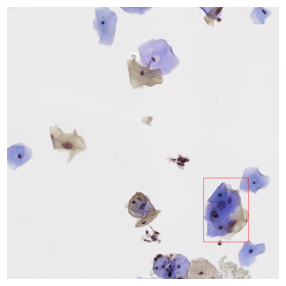

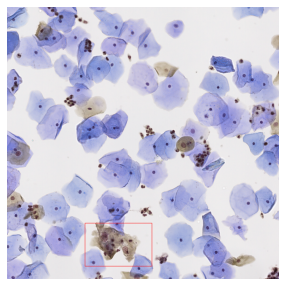

In [36]:
# check abnormally large sample
test_df = df[(df['area'] > 400)]
test_df.sort_values(by = 'area', inplace=True, ascending=True)
print(test_df.shape)
path = test_df[['file_name']].values
boxes = test_df[['xmin', 'ymin', 'w', 'h']].values
labels = test_df[['label']].values

rel_path = '../../lbp_data/'
# for NUM in range(len(test_df)) :
for NUM in range(10) :
    img = cv2.imread(rel_path + path[NUM][0])
    print(labels[NUM])
    visualize(img, [boxes[NUM]])  

In [37]:
df.label.value_counts()

ASC-US       11057
LSIL          5249
Negative      3647
HSIL          1466
ASC-H         1225
Carcinoma       19
Name: label, dtype: int64

In [38]:
df.shape

(22663, 14)